This is a Markdown cell. Change the word "Example" in the title to your name or alias. Customize your work and develop your own professional communication 'branding' for your projects. 

# Eric's California Housing Price Prediction
**Author:** Eric Meyer

**Date:** 03/14/2025  

**Objective:** Predict the median house price in California using available housing features.


This is a Markdown cell.

## Introduction
This project uses the California housing dataset to predict house prices based on features such as median income, average number of rooms, and house age. We'll clean the data, train a linear regression model, and explore ways to improve performance.

This is a Markdown cell.

## Imports
In the code cell below, import the necessary Python libraries for this notebook.  

In [13]:
# Import pandas for data manipulation and analysis (we might want to do more with it)
import pandas as pd

# Import pandas for data manipulation and analysis  (we might want to do more with it)
import numpy as np

# Import matplotlib for creating static visualizations
import matplotlib.pyplot as plt

# Import seaborn for statistical data visualization (built on matplotlib)
import seaborn as sns

# Import the California housing dataset from sklearn
from sklearn.datasets import fetch_california_housing

# Import train_test_split for splitting data into training and test sets
from sklearn.model_selection import train_test_split

# Import LinearRegression for building a linear regression model
from sklearn.linear_model import LinearRegression

# Import performance metrics for model evaluation
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

This is a Markdown cell

## Section 1. Load and Explore the Data

### 1.1 Load the dataset and display the first 10 rows
Load the California housing dataset directly from `scikit-learn`.
- The `fetch_california_housing` function returns a dictionary-like object with the data.
- Convert it into a pandas DataFrame.
- Display just the first 10 rows using `head()`.

Example code:

data = fetch_california_housing(as_frame=True)
data_frame = data.frame

data_frame.head(10)

In [14]:
# Load the data
data = fetch_california_housing(as_frame=True)
data_frame = data.frame

# Might be large. Display just the first 10 rows (you can change this number)
data_frame.head(10)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


This is a Markdown cell.

### 1.2 Check for missing values and display summary statistics

In the cell below:
1. Use `info()` to check data types and missing values.
2. Use `describe()` to see summary statistics.
3. Use `isnull().sum()` to identify missing values in each column.

Example code:

data_frame.info()

data_frame.describe()

data_frame.isnull().sum()

In [15]:
# Check data info
data_frame.info()

# Check summary of stats for data
data_frame.describe()

# Check for any null values
data_frame.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

This is a Markdown cell


Analysis: 

1) How many data instances (also called data records or data rows) are there? **20,640**

2) How many features (also columns or attributes) are there? **9**

3) What are the names of the features? ("Feature" is used most often in ML projects.) **MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude, MedHouseVal**

4) Which features are numeric? **All of them**

5) Which features are categorical (non-numeric)? **None of them**

6) Are there any missing values? How should they be handled? Should we delete a sparsely populated column? Delete an incomplete data row? Substitute with a different value? **No**

7) What else do you notice about the dataset? Are there any data issues? **Seems to be a decent dataset. I would say anymore info on demographics and geography would be helpful though.**

## Section 2. Visualize Feature Distributions
### 2.1 Create histograms, boxplots, and scatterplots

- Create histograms for all numeric features using `data_frame.hist()` with 30 bins.
- Create a boxenplots using `sns.boxenplot()`.
- Create scatter plots using `sns.pairplot()`.

First, histograms

Generate histograms for all numerical columns

Example code:

data_frame.hist(bins=30, figsize=(12, 8))

plt.show()

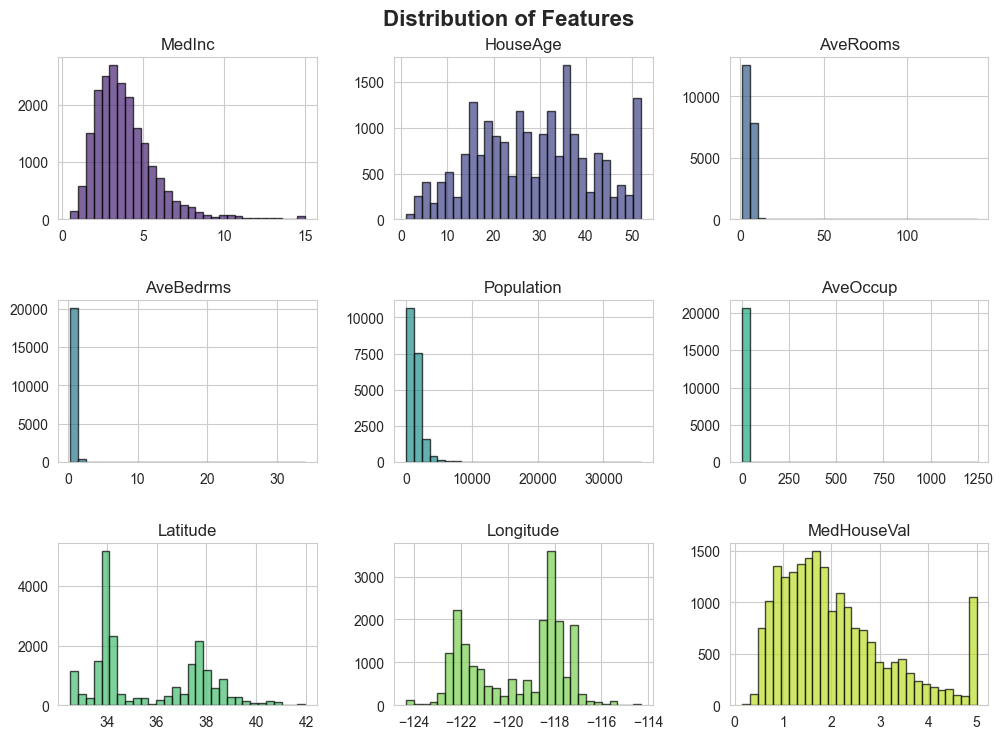

In [11]:
# Apply Seaborn style
sns.set_style("whitegrid")

# Create histograms
axs = data_frame.hist(
    bins=30, 
    figsize=(12, 8), 
    edgecolor="black",
    alpha=0.7
)

# Get a color palette matching the number of columns
colors = sns.color_palette("viridis", len(data_frame.columns))

# Apply colors to each histogram
for ax, color in zip(axs.flatten(), colors):
    for patch in ax.patches:
        patch.set_facecolor(color)

# Improve layout
plt.suptitle("Distribution of Features", fontsize=16, fontweight='bold')
plt.subplots_adjust(top=0.92, hspace=0.5)

# Show plot
plt.show()



Generate one Boxenplot for each column (good for large datasets)

Example code:

for column in data_frame.columns:
    plt.figure(figsize=(6, 4))
    sns.boxenplot(data=data_frame[column])
    plt.title(f'Boxenplot for {column}')
    plt.show()

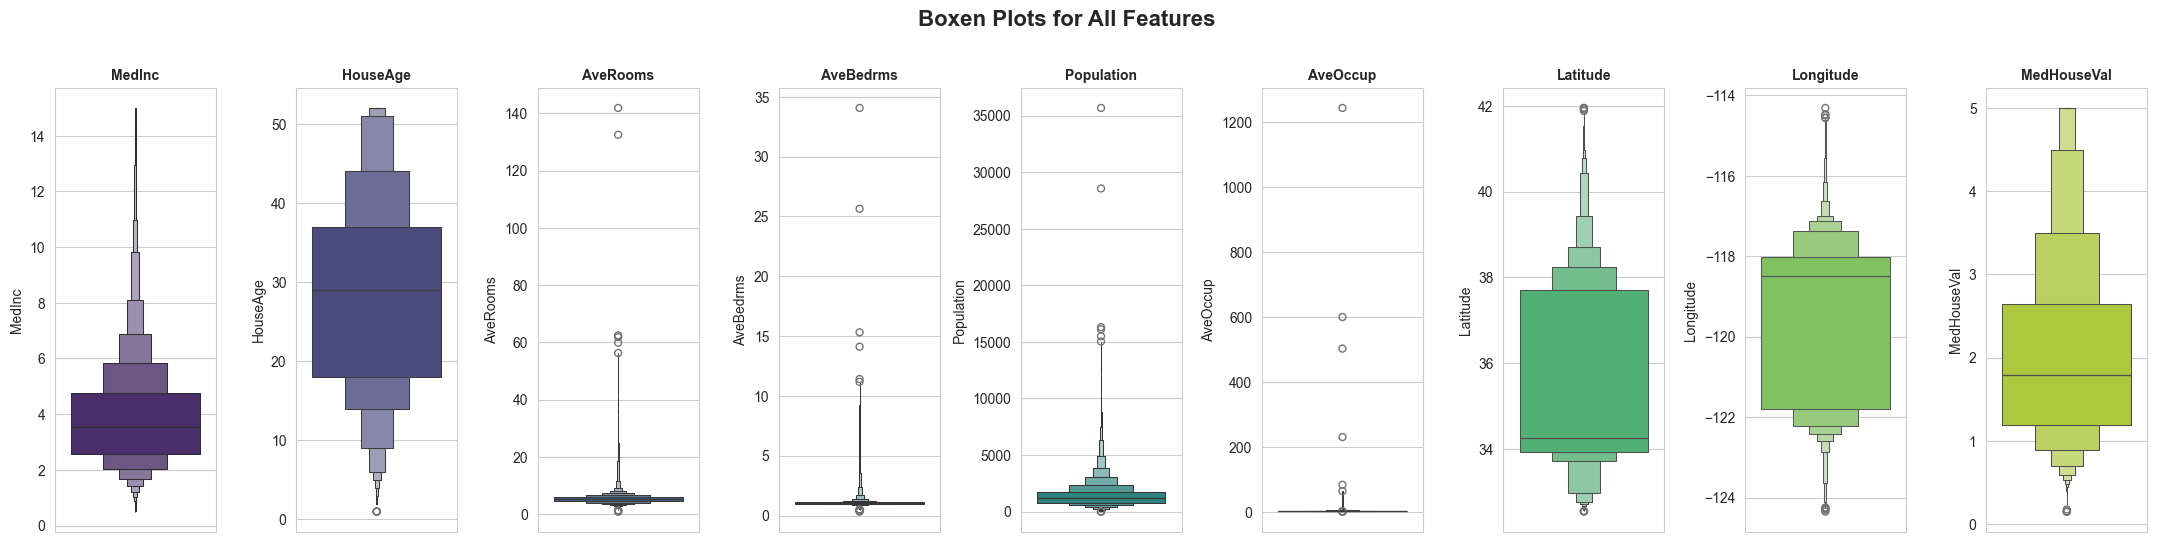

In [16]:
# Apply Seaborn style
sns.set_style("whitegrid")

# Set figure size for all subplots
fig, axes = plt.subplots(nrows=1, ncols=len(data_frame.columns), figsize=(len(data_frame.columns) * 3, 6))

# Get color palette
colors = sns.color_palette("viridis", len(data_frame.columns))

# Loop through each column and plot a boxen plot
for ax, column, color in zip(axes, data_frame.columns, colors):
    sns.boxenplot(y=data_frame[column], ax=ax, color=color)
    ax.set_title(f"{column}", fontsize=10, fontweight="bold")
    ax.set_xlabel("")

# Improve layout
plt.suptitle("Boxen Plots for All Features", fontsize=16, fontweight='bold')
plt.subplots_adjust(top=0.85, wspace=0.5)

# Show plot
plt.show()

Third - Scatter Plots

Generate all Scatter plots (there is a LOT of data, so this will take a while)

Comment out after analysis to speed up the notebook.

Example code:

sns.pairplot(data_frame)

plt.show()

<Figure size 1200x800 with 0 Axes>

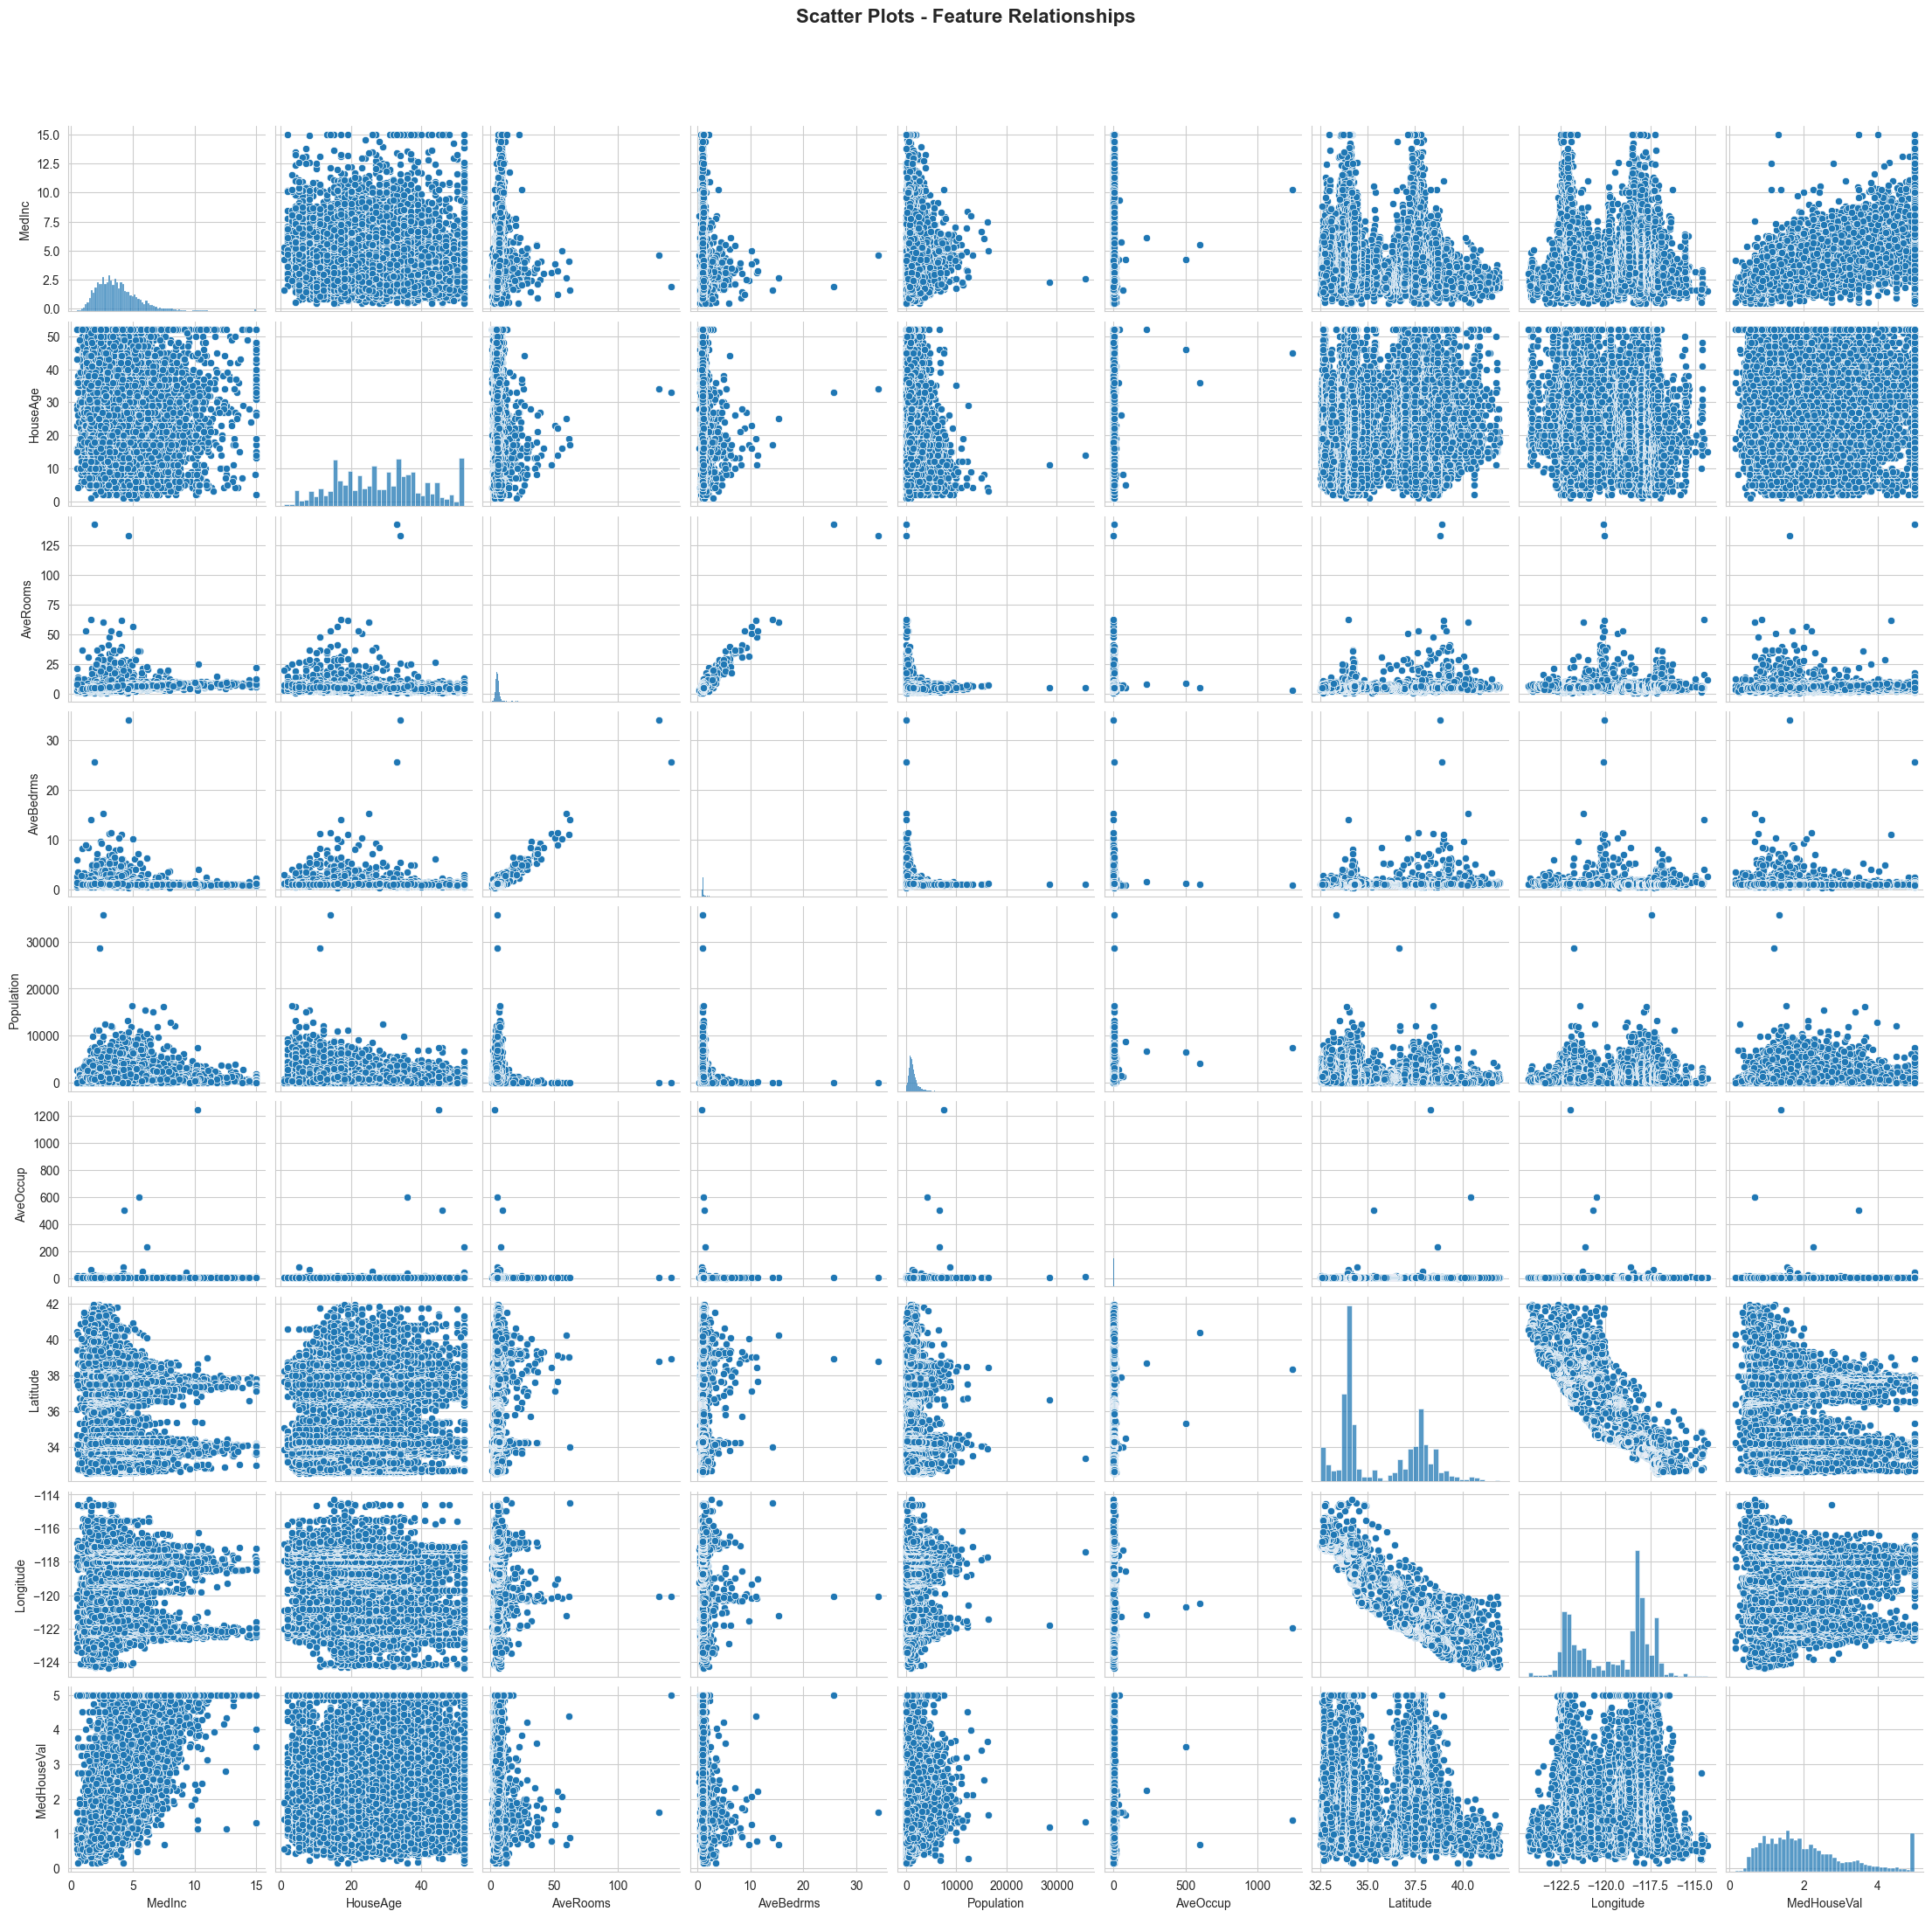

In [18]:
# Apply Seaborn style
sns.set_style("whitegrid")

# Set up the figure size
plt.figure(figsize=(12, 8))

# Generate the pairplot without palette, as hue is not needed for numerical data
sns.pairplot(data_frame)

# Add a title
plt.suptitle("Scatter Plots - Feature Relationships", fontsize=16, fontweight='bold')

# Improve layout and adjust title position
plt.subplots_adjust(top=0.92)  # Prevent title from overlapping with plots

# Show plot
plt.show()

This is a Markdown Cell.

## Section 3. Feature Selection and Justification
### 3.1 Choose two input features for predicting the target

- Select `MedInc` and `AveRooms` as predictors.
- Select `MedHouseVal` as the target variable.

In the following, 
X is capitalized because it represents a matrix (consistent with mathematical notation).
y is lowercase because it represents a vector (consistent with mathematical notation).


First:
- Create a list of contributing features and the target variable
- Define the target feature string (the variable we want to predict)
- Define the input DataFrame
- Define the output DataFrame


Example code:

features: list = ['MedInc', 'AveRooms']

target: str = 'MedHouseVal'

df_X = data_frame[features]

df_y = data_frame[target]


In [21]:
# Our features
features: list = ['MedInc', 'AveRooms']

# Our target variable
target: str = 'MedHouseVal'

# Our input (X) and output (y) DataFrames
df_X = data_frame[features]
df_y = data_frame[target]

# Showing first rows of each
df_X.head(), df_y.head()

(   MedInc  AveRooms
 0  8.3252  6.984127
 1  8.3014  6.238137
 2  7.2574  8.288136
 3  5.6431  5.817352
 4  3.8462  6.281853,
 0    4.526
 1    3.585
 2    3.521
 3    3.413
 4    3.422
 Name: MedHouseVal, dtype: float64)

This is a Markdown Cell.


## Section 4. Train a Linear Regression Model
### 4.1 Split the data
Split the dataset into training and test sets (80% train / 20% test).

Call train_test_split() by passing in: 

- df_X – Feature matrix (input data) as a pandas DataFrame
- y – Target values as a pandas Series
- test_size – Fraction of data to use for testing (e.g., 0.1 = 10%)
- random_state – Seed value for reproducible splits

We'll get back four return values:

- X_train – Training set features (DataFrame)
- X_test – Test set features (DataFrame)
- y_train – Training set target values (Series)
- y_test – Test set target values (Series)


Example code:

X_train, X_test, y_train, y_test = train_test_split(
    df_X, df_y, test_size=0.2, random_state=42)


In [24]:
# Import the train_test_split function
from sklearn.model_selection import train_test_split

# Training and test datasets
X_train, X_test, y_train, y_test = train_test_split(
    df_X,  # Feature matrix
    df_y,  # Target values
    test_size=0.2,  # 20% of data for testing
    random_state=42  # Seed for reproducibility
)

# Print the shapes of the resulting splits
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (16512, 2)
X_test shape: (4128, 2)
y_train shape: (16512,)
y_test shape: (4128,)


This is a Markdown Cell.

### 4.2 Train the model
Create and fit a `LinearRegression` model.

LinearRegression – A class from sklearn.linear_model that creates a linear regression model.

model – An instance of the LinearRegression model. This object will store the learned coefficients and intercept after training.

fit() – Trains the model by finding the best-fit line for the training data using the Ordinary Least Squares (OLS) method.

X_train – The input features used to train the model.

y_train – The target values used to train the model.


Example code:


model = LinearRegression()

model.fit(X_train, y_train)


In [25]:
# Import the LinearRegression class
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Output the learned coefficients and intercept
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")



Coefficients: [ 0.43626089 -0.04017161]
Intercept: 0.5972677793933256


This is a Markdown Cell.

Make predictions for the test set.

The model.predict() method applies this equation to the X test data to compute predicted values.

y_pred = model.predict(X_test)

y_pred contains all the predicted values for all the rows in X_test based on the linear regression model.


Example code:

y_pred = model.predict(X_test)


In [26]:
# Use the trained model to make predictions on the test data
y_pred = model.predict(X_test)

# Output the predicted values
print(f"Predictions: {y_pred[:5]}")  # Show the first 5 predicted values


Predictions: [1.16230214 1.49913482 1.95573059 2.85275505 2.00167731]


This is a Markdown Cell. 

### 4.3 Report R^2, MAE, RMSE
Evaluate the model using R^2, MAE, and RMSE.

First:

- Coefficient of Determination (R^2) - This tells you how well the model explains the variation in the target variable. A value close to 1 means the model fits the data well; a value close to 0 means the model doesn’t explain the variation well.


Example code:
  
r2 = r2_score(y_test, y_pred)

print(f'R²: {r2:.2f}')



In [27]:

# Import evaluation metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Calculate R²
r2 = r2_score(y_test, y_pred)
print(f'R²: {r2:.2f}')

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae:.2f}')

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')


R²: 0.46
Mean Absolute Error (MAE): 0.62
Root Mean Squared Error (RMSE): 0.84



This is a Markdown Cell

Second:

- Mean Absolute Error (MAE) - This is the average of the absolute differences between the predicted values and the actual values. A smaller value means the model’s predictions are closer to the actual values.


Example code:

mae = mean_absolute_error(y_test, y_pred)

print(f'MAE: {mae:.2f}')




In [29]:
# Import the mean_absolute_error function
from sklearn.metrics import mean_absolute_error

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae:.2f}')


Mean Absolute Error (MAE): 0.62



This is a Markdown Cell

Third:

- Root Mean Squared Error (RMSE) - This is the square root of the average of the squared differences between the predicted values and the actual values. It gives a sense of how far the predictions are from the actual values, with larger errors having more impact.

Example code:

rmse = root_mean_squared_error(y_test, y_pred)

print(f'RMSE: {rmse:.2f}')


In [31]:
# Import the required function for RMSE
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')


Root Mean Squared Error (RMSE): 0.84
